# Tidal Forces

* The orbital motion of two bodies is governed by Newton’s law of gravitation for point masses. However, the dependence of the gravitational force on distance gives rise to tidal forces between different parts of an extended body, such as a planet, in the gravitational field of another body.
* The formula for gravitational acceleration at the surface of a planet:
  > $g = \frac{G \cdot M}{r^2}$
  
  where:

  $g$: the gravitational acceleration at the surface of the planet

  $G$: the universal gravitational constant

  $M$: the mass of the planet

  $r$: the radius of the planet

* In vector notation, unit vectors are typically used to indicate direction without regard to magnitude. $e_r = \frac{r}{|r|}$ is the unit vector in radial direction from the center of that body has $M$.
* If we think of different parts of a planet rather than a test mass placed at different positions, the tidal force is given by the force difference with respect to the center of mass. The difference between the gravitational forces exerted on the test mass at neighboring point $r$ and $r+dr$ can be expressed by the field gradient:
  
  The gravitational force $F$ exerted on a mass $m$ due to a larger mass $M$ is given by Newton's law of universal gravitation:
  * $F = \frac{GMm}{r^2}$

  The gravitational field $g$ at a distance $r$ from the mass $M$:
  * $g=\frac{F}{m}=\frac{GM}{r^2}$

  The difference in gravitational force (or field) at two neighboring points $r$ and $r+dr$ (where $dr$ is a small change in distance) is the gradient of the gravitational field. Mathematically, this gradient can be expressed as the derivative of the gravitational field with respect to distance:
  * $\frac{dg}{dr} = \frac{d}{dr}\frac{GM}{r^2}$
  * $\frac{dg}{dr} = -\frac{2 \cdot G \cdot M}{r^3}$

* Let's consider a point P on or within the Earth, at a distance R from the Earth's center (C), where $R <= R_{E}$ (with $R_{E}$ being the Earth's radius). The tidal force at point P due to the Moon can be analyzed by considering the difference in the Moon's gravitational force at P and at the center of the Earth. So, the tidal force at point P is approximately:
 > $\Delta F \approx \frac{-2 \cdot G \cdot M_{moon} \cdot m}{d^3} \cdot R$

 where:

 $R$: represents the distance from the center of the Earth to a point $P$ on or within the Earth. In the tidal force calculations $R$ is used to determine the strength of the tidal effect at different points on or inside the Earth.

 * If we're incorporating a trigonometric function and not considering the negative sign in the formula, it seems we are referring to a more detailed aspect of tidal force calculations, which involves the angle between the line connecting the centers of the Earth and Moon and the line from the Earth's center to the point $P$:
 > $\Delta F = \frac{2 \cdot G \cdot M_{moon} \cdot m}{d^3} \cdot R \cdot \cos(\theta)$

 where:

 $\Delta F$: is the tidal force at point $P$

 $G$: the gravitational constant

 $M_{moon}$: the mass of the Moon

 $m$: the mass at point $P$

 $d$: the distance from the Moon to the Earth’s center

 $R$: the distance from the Earth’s center to point

 $\theta$: is the angle between the line connecting the centers of the Earth and Moon and the line from the Earth's center to point $P$

 * A vector representation of the tidal force exerted by the Moon on a point mass $m$ at a Point $P$ on or within the Earth:

 > $\Delta F \approx \frac{G \cdot M_{moon} \cdot m \cdot R}{d^3} \cdot (2 \cdot \cos(Q), -\sin(Q))$

* **Gravitational Force Decreases with Distance**: The gravitational force exerted by the Moon (or any other celestial body) decreases with the square of the distance from the body. This means that the side of the Earth closer to the Moon experiences a stronger gravitational pull than the side farther away.
* **Differential Effect of Gravity**: Tidal forces are caused by the difference in the Moon's gravitational pull on different parts of the Earth. The gravitational pull is not uniform across the Earth's diameter due to its extended size. The near side (facing the Moon) experiences a stronger pull than the center of the Earth, and the center of the Earth experiences a stronger pull than the far side.
* **Magnitude of Tidal Force**: The tidal force is the difference in gravitational pull across the Earth's diameter. Although the absolute strength of gravity decreases with distance, the rate of this decrease (the gradient of gravity) is what causes the tidal bulge. The farther you are from the Earth's center (up to a point), the greater the difference in gravitational pull you experience compared to the center of the Earth, thus increasing the tidal force.


In [1]:
%%capture
!pip install astropy

In [105]:
import numpy as np
from scipy.constants import G,g
from astropy.constants import R_earth,M_earth
from astropy import units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation
plt.style.use("dark_background")
%matplotlib inline

In [24]:
print(f"Gravitational Constant: {G}")

Gravitational Constant: 6.6743e-11


In [25]:
print(f"Earth Radius: {R_earth}")
print(f"Earth Mass: {M_earth}")
print(f"Acceleration: {g} m/s^2")

Earth Radius: 6378100.0 m
Earth Mass: 5.972167867791379e+24 kg
Acceleration: 9.80665 m/s^2


In [29]:
def TidalForce(massMoon:int or float,distanceToEarthMoon:int or float,radiusEarth:int or float,massPoint:int or float)->int or float:
  """
    Calculate the tidal force exerted by the Moon on the Earth.

    Parameters:
    massMoon (float): Mass of the Moon (in kilograms).
    distanceToEarthMoon (float): Distance from Earth to Moon (in meters).
    radiusEarth (float): Radius of the Earth (in meters).
    massPoint (float): Mass of the point where the force is calculated (in kilograms).

    Returns:
    float: Tidal force in Newtons (N).
  """
  # Gravitational force at the Earth's surface due to the Moon
  forceGravityMoon = (G*massMoon*massPoint)/(distanceToEarthMoon**3)
  # The factor of 2 accounts for the differential effect
  # The negative sign in the formula for tidal forces is crucial as it indicates the direction of the force, we don't use for now
  tidalForce = 2*forceGravityMoon*radiusEarth # delta
  return tidalForce

In [30]:
massMoon = 7.34767309e22  # in kilograms
distanceToEarthFromMoon = 384400e3  # in meters
massPoint = 1 # mass of the point in kilograms
radiusEarth = 6371e3 # in meters

In [31]:
tidalForce = TidalForce(massMoon,distanceToEarthFromMoon,radiusEarth,massPoint)
print(f"Tidal Force - Depended Moon: {tidalForce} Newtons (N)")

Tidal Force - Depended Moon: 1.100127479952685e-06 Newtons (N)


## Another Application

> $\text{tidalBulge} = \frac{15 \times \text{massMoon} \times R_{\text{earth}}^4}{8 \times M_{\text{earth}} \times \text{semiMajorMoonOrbit}^3}$

* **Tidal Force Proportional to Mass of Moon**: The gravitational force (and thus the tidal force) exerted by the Moon is directly proportional to its mass.

* **Inversely Proportional to Cube of Distance**: The tidal force is inversely proportional to the cube of the distance between the Earth and the Moon (the semi-major axis of the Moon's orbit).

* **Dependence on Earth's Radius**: The effect of the tidal force is further modulated by the Earth's radius. The $R^{4}_{earth}$ term suggests a strong dependence on the Earth's size, as the tidal bulge is the result of the Earth's deformation due to the tidal force.

* Scaling Factor and Constants: The factors of 15 and 8 in the formula are scaling factors that arise from the mathematical derivation of the tidal force and the assumptions made to simplify the model.

**This formula provides an estimate of the height of the tidal bulge - the elevation of water above the Earth's average sea level due to the Moon's gravitational pull.**

In [32]:
massMoon = 0.07346e24 # mass of the moon in kg
semiMajorMoonOrbit = 3.844e8 # semi-major axis of moon orbit in m
coeffFormula = G*massMoon/semiMajorMoonOrbit**3
accelerationScale = 2*coeffFormula*R_earth.value
print("Tidal Acceleration: {:.2e} m/s^2 = {:.2e} g".format(accelerationScale,accelerationScale/g))

Tidal Acceleration: 1.10e-06 m/s^2 = 1.12e-07 g


In [33]:
# the size of the tidal bulge on Earth due to the Moon's gravitational influence, neglecting the rigidity of Earth
tidalBulge = 15*massMoon*R_earth.value**4/(8*M_earth.value*semiMajorMoonOrbit**3)
print("Size of Tidal Bulge: {:.2f} m".format(tidalBulge))

Size of Tidal Bulge: 0.67 m


In [34]:
# array of evenly spaced grid points along x- and y-axis
xPoints = np.linspace(-1.1,1.1,num=23,endpoint=True)
yPoints = np.linspace(-1.1,1.1,num=23,endpoint=True)

In [35]:
# create two-dimensional mesh grid scaled by Earth radius
# To obtain physical distances, the normalized coordinates are scaled with the radius of Earth
# returns two-dimensional arrays defining the components Rx and Ry, as a matrix
# Two-dimensional mesh grids representing the x and y coordinates of points on the Earth's surface
Rx,Ry = np.meshgrid(R_earth.value*xPoints,R_earth.value*yPoints)

In [36]:
# radial distances of mesh points from (0,0), representing the center of the Earth
radialDistance = np.sqrt(Rx*Rx+Ry*Ry)

In [37]:
# Arrays representing the x and y components of the tidal acceleration at each point on the grid.
# These are masked where the radial distance exceeds the Earth's radius, ensuring calculations only apply to points on or within the Earth.
accelerationX = np.ma.masked_where(radialDistance>R_earth.value,2*coeffFormula*Rx)
accelerationY = np.ma.masked_where(radialDistance>R_earth.value,-coeffFormula*Ry)

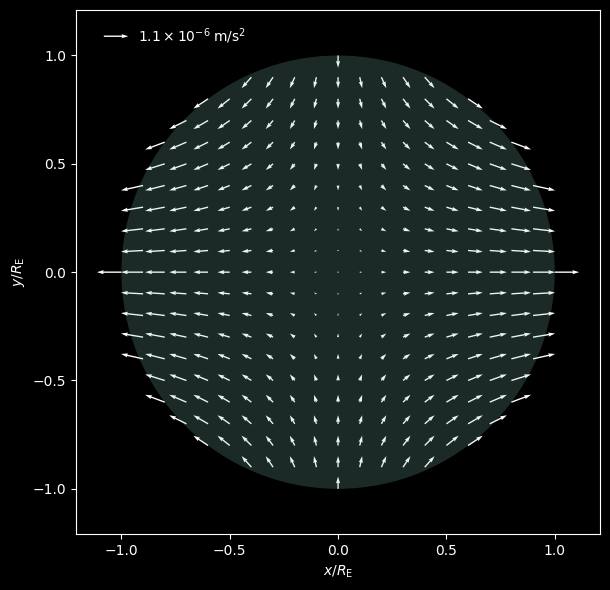

In [40]:
figure,axs = plt.subplots(figsize=(11,6))
axs.set_aspect("equal")
arrows = axs.quiver(xPoints,yPoints,accelerationX,accelerationY,color="white")
axs.quiverkey(
    arrows,
    X=0.1,
    Y=0.95,
    U=accelerationScale,
    label=r"$1.1\times 10^{-6}\;\mathrm{m/s}^2$",
    labelpos="E"
)
circle = Circle((0,0),1,alpha=0.2,edgecolor=None)
axs.add_patch(circle)
axs.set_xlabel(r"$x/R_{\mathrm{E}}$",fontsize=10)
axs.set_ylabel(r"$y/R_{\mathrm{E}}$",fontsize=10)
plt.tight_layout()
plt.show()

**While X and Y determine the arrow positions (the meshgrid is constructed implicitly), their length and orientation is given by accelerationX and accelerationY.**

## Jupiter-Europa / On Jupiter

**To create a similar script for visualizing tidal acceleration caused by Jupiter on one of its moons, let's choose one of Jupiter's major moons as an example - say, Europa.**

In [67]:
from astropy.constants import G

In [68]:
massJupiter = 1.898e27  # Mass of Jupiter in kg
massEuropa = 4.8e22  # Mass of Europa in kg
semiMajorAxisEuropa = 671e6  # Semi-major axis of Europa's orbit in m
radiusEuropa = 1560.8e3  # Radius of Europa in m
radiusJupiter = 69911e3 # Radius of Jupiter in m

In [69]:
coeffFormula = G.value*massEuropa/semiMajorAxisEuropa**3
acceleration = 2*coeffFormula*radiusJupiter
print(f"Tidal Acceleration: {acceleration} m/s^2")

Tidal Acceleration: 1.4827055406931906e-06 m/s^2


In [73]:
# Mesh grid creation
xPoints = np.linspace(-1.1,1.1,num=23,endpoint=True)
yPoints = np.linspace(-1.1,1.1,num=23,endpoint=True)
Rx,Ry = np.meshgrid(radiusJupiter*xPoints,radiusJupiter*yPoints)

In [74]:
# Radial distances and acceleration components
radialDistance = np.sqrt(Rx*Rx+Ry*Ry)
accelerationX = np.ma.masked_where(radialDistance>radiusJupiter,2*coeffFormula*Rx)
accelerationY = np.ma.masked_where(radialDistance>radiusJupiter,-coeffFormula*Ry)

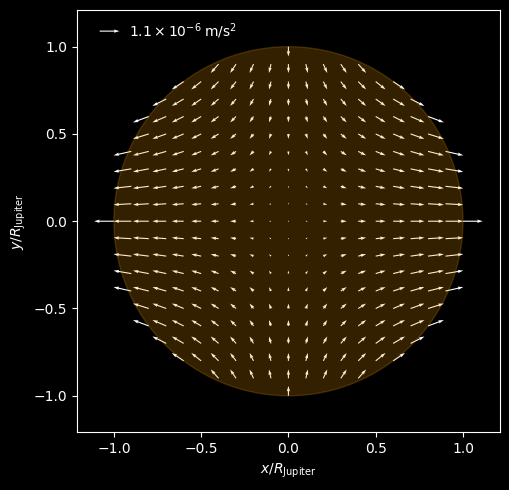

In [75]:
# Visualization
figure,axs = plt.subplots(figsize=(12,5))
axs.set_aspect("equal")
arrows = axs.quiver(xPoints,yPoints,accelerationX,accelerationY,color="white")
axs.quiverkey(
    arrows,
    X=0.1,
    Y=0.95,
    U=acceleration,
    label=r"$1.1\times 10^{-6}\;\mathrm{m/s}^2$",
    labelpos="E"
)
circle = Circle((0,0),1,alpha=0.2,edgecolor=None,color="orange")
axs.add_patch(circle)
axs.set_xlabel(r"$x/R_{\mathrm{Jupiter}}$",fontsize=10)
axs.set_ylabel(r"$y/R_{\mathrm{Jupiter}}$",fontsize=10)
plt.tight_layout()
plt.show()

# Roche Limit

* The Roche limit is the distance within which a celestial body, held together only by its gravity, will disintegrate due to the tidal forces exceeding its gravitational self-attraction:
> $d = R \times (\frac{2 \times p_{planet}}{p_{satellite}})^{1/3}$

where:

$R$: the radius of the planet

$p_{planet}$: the densities of the planet

$p_{planet}$: the densities of the satellite

In [104]:
def RocheLimitCalculator(radiusPlanet:int or float,densityPlanet:int or float,densitySatellite:int or float)->int or float:
  """
    Calculate the Roche limit for a satellite orbiting a planet.

    Parameters:
    radiusPlanet (float): Radius of the planet in meters.
    densityPlanet (float): Density of the planet in kg/m^3.
    densitySatellite (float): Density of the satellite in kg/m^3.

    Returns:
    float: Roche limit in meters.
  """
  return radiusPlanet*(2*densityPlanet/densitySatellite)**(1/3)

In [106]:
radiusSaturn = 58232e3  # Radius of Saturn in meters
densitySaturn = 687.3  # Density of Saturn in kg/m^3
densitySatellite = 500  # Assumed density of the satellite in kg/m^3

In [107]:
rocheLimit = RocheLimitCalculator(radiusSaturn,densitySaturn,densitySatellite)
print(f"Roche Limit for Saturn: {rocheLimit} m")

Roche Limit for Saturn: 81576265.19115637 m


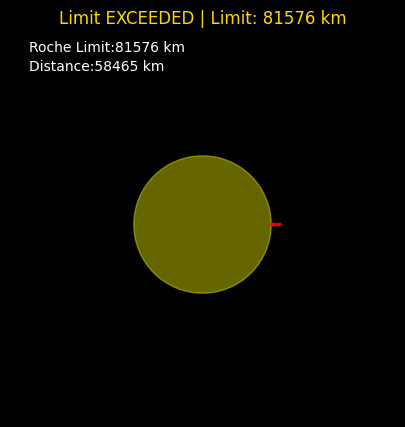

In [115]:
figure,axs = plt.subplots(figsize=(10,5))
def UpdateFunction(frame):
  axs.clear()
  axs.set_xlim(-2*rocheLimit, 2*rocheLimit)
  axs.set_ylim(-2*rocheLimit, 2*rocheLimit)
  axs.set_aspect("equal")
  axs.axis("off")
  saturn = Circle(
    (0,0),
    radiusSaturn,
    color="yellow",
    alpha=0.4,
  )
  axs.add_patch(saturn)
  satelliteDistance = rocheLimit+(rocheLimit-radiusSaturn)*(1-frame/100)
  if satelliteDistance <= rocheLimit:
    axs.set_title(f"Limit EXCEEDED | Limit: {rocheLimit/1e3:.0f} km",color="gold")
    fragments = min(30,int((rocheLimit-satelliteDistance)))
    for index in range(fragments):
      fragmentRadius = 0.01*rocheLimit*np.random.uniform(0.5,1.5)
      fragmentX = satelliteDistance+np.random.uniform(-0.1,0.1)*rocheLimit
      fragmentY = np.random.uniform(-0.1,0.1)*rocheLimit
      if np.sqrt(fragmentX**2+fragmentY**2) > radiusSaturn:
        fragmentObject = Circle((fragmentX,0),fragmentRadius,color="red",alpha=0.4)
        axs.add_patch(fragmentObject)
  else:
    satellite = Circle((satelliteDistance,0),0.05*rocheLimit,color="white",alpha=0.4)
    axs.text(int(satelliteDistance),int((0.05*rocheLimit)-1.8),"Satellite",color="white",fontsize=6)
    axs.add_patch(satellite)
  axs.text(-1.8*rocheLimit,1.8*rocheLimit,f'Roche Limit:{rocheLimit/1000:.0f} km',color='white',fontsize=10)
  axs.text(-1.8*rocheLimit,1.6*rocheLimit,f'Distance:{satelliteDistance/1000:.0f} km',color='white',fontsize=10)
ani = FuncAnimation(figure,UpdateFunction,frames=np.arange(0,200,1),interval=40)
ani.save('roche_limit.mp4',writer='ffmpeg', fps=20)
plt.show()